# Algoritmos populares de agrupación / Clustering Algorithms

## Visualizando datos de COVID-19

Actualización a julio de 2024

In [1]:
# Dependencies
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install pip
#!pip install --upgrade seaborn
#!pip install --upgrade numpy

In [3]:
# Opciones de visualizació de cifras:
pd.options.display.float_format = '{:,.2f}'.format #'${:,.2f}'

## Descarga de datos

Datos reportados por la Secretaría de Salud sobre la COVID19. Los datos se publican diariamente y se pueden encontrar aquí.

Los datos están en formato zip, dentro del archivo comprimido hay un archivo de tipo CSV.

Los utilizaremoss sin descargarlos y descomprimirlos.

Fuente: https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia?idiom=es

In [4]:
# Cara renglón en este data set es una persona

df_2024 = pd.read_csv('https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2024/07/datos_abiertos_influenza_covid19_16.07.2024.zip', 
                  compression = 'zip', encoding = 'latin1')

df_2024.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2024-07-16,0aa89f,1,10,9,2,15,9,3,1,2024-01-26,2024-01-25,9999-99-99,97,2,31,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,5,5,2,97,7,7,99,MÃ©xico,97,97
1,2024-07-16,g6cb0c4,1,12,29,1,29,29,33,2,2024-01-02,2024-01-01,9999-99-99,2,2,27,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,998,2,97,7,3,99,MÃ©xico,97,2
2,2024-07-16,gbbd8c2,1,4,32,2,32,32,56,2,2024-01-02,2024-01-02,9999-99-99,2,2,67,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,5,5,2,97,7,7,99,MÃ©xico,97,2
3,2024-07-16,gbabd45,1,4,22,2,7,22,16,1,2024-01-01,2024-01-01,9999-99-99,97,1,32,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,1,5,5,2,97,7,7,99,MÃ©xico,97,97
4,2024-07-16,ga7fcdd,1,4,1,2,1,1,1,2,2024-01-02,2024-01-01,9999-99-99,2,2,80,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,5,5,2,97,7,7,99,MÃ©xico,97,2


In [5]:
#

df_2024.tail()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
101241,2024-07-16,gcdab56,1,6,30,2,30,30,193,2,2024-07-15,2024-07-13,9999-99-99,2,2,41,1,97,2,2,1,2,2,2,1,2,1,2,2,2,2,1,999,999,2,97,6,6,99,MÃ©xico,97,2
101242,2024-07-16,g660205,1,12,9,1,9,9,13,1,2024-07-12,2024-07-11,9999-99-99,97,2,70,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,997,997,2,97,6,6,99,MÃ©xico,97,97
101243,2024-07-16,g87a039,1,12,9,1,9,9,12,1,2024-07-12,2024-07-10,9999-99-99,97,2,69,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,997,997,2,97,6,6,99,MÃ©xico,97,97
101244,2024-07-16,gadbb76,1,6,29,2,29,29,24,1,2024-07-15,2024-07-12,9999-99-99,97,2,2,1,97,2,2,2,2,2,2,2,2,2,2,2,2,99,2,997,997,2,97,6,6,99,MÃ©xico,97,97
101245,2024-07-16,g924db8,1,3,21,2,21,21,179,2,2024-07-16,2024-07-15,9999-99-99,2,2,94,1,97,2,2,1,1,2,2,1,2,2,2,2,2,2,1,999,999,2,97,6,6,99,MÃ©xico,97,2


In [6]:
#

df_2024['CLASIFICACION_FINAL'] = df_2024['CLASIFICACION_FINAL_COVID']

#df_2024['CLASIFICACION_FINAL'] = df_2024['CLASIFICACION_FINAL_FLU']

In [7]:
# Cara renglón en este data set es una persona

df_2023 = pd.read_csv('https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2023/COVID19MEXICO2023.zip', 
                  compression = 'zip', encoding = 'latin1')

df_2023.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2024-05-17,c9a5ed,2,12,9,2,9,9,9,1,2023-02-26,2023-02-22,9999-99-99,97,2,29,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
1,2024-05-17,cbecc9,2,6,5,1,5,5,28,1,2023-03-24,2023-03-19,9999-99-99,97,2,59,1,2,99,99,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
2,2024-05-17,370480,1,12,19,1,24,19,46,2,2023-01-15,2023-01-15,9999-99-99,2,2,71,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,6,99,MÃ©xico,97,2
3,2024-05-17,11adf2,1,12,31,2,31,31,50,1,2023-04-04,2023-04-04,9999-99-99,97,2,53,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
4,2024-05-17,0aa89f,1,10,9,2,15,9,3,1,2024-01-26,2024-01-25,9999-99-99,97,2,31,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,MÃ©xico,97,97


In [8]:
# Cara renglón en este data set es una persona

df_2022 = pd.read_csv('https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2022/COVID19MEXICO2022.zip', 
                  compression = 'zip', encoding = 'latin1')

df_2022.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-06-01,15ec76,1,12,5,2,5,5,35,1,2022-01-11,2022-01-08,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,99,MÃ©xico,97,97
1,2023-06-01,1ce5c6,2,6,9,2,9,9,10,2,2022-02-02,2022-02-02,9999-99-99,2,2,70,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,2
2,2023-06-01,07e45f,1,6,12,1,12,12,29,1,2022-03-20,2022-03-15,9999-99-99,97,2,82,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2023-06-01,17d402,2,12,9,2,9,9,8,1,2022-06-25,2022-06-23,9999-99-99,97,2,25,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97
4,2023-06-01,0a392b,1,12,7,1,7,7,19,1,2022-08-23,2022-08-21,9999-99-99,97,2,36,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,6,99,MÃ©xico,97,97


In [9]:
#

df_2022.tail()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
6451939,2023-06-01,bc6fd3,1,12,12,1,12,12,1,2,2022-01-31,2022-01-28,9999-99-99,2,1,31,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,3,99,MÃ©xico,97,2
6451940,2023-06-01,d5d7f8,1,4,12,2,12,12,1,1,2022-01-19,2022-01-18,9999-99-99,97,2,53,1,97,2,2,1,2,2,2,1,2,2,2,2,2,1,2,97,1,1,3,99,MÃ©xico,97,97
6451941,2023-06-01,7c2109,1,12,30,1,30,30,136,1,2022-01-23,2022-01-22,9999-99-99,97,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,99,MÃ©xico,97,97
6451942,2023-06-01,96f8da,2,12,9,1,9,9,8,1,2022-01-27,2022-01-27,9999-99-99,97,2,55,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,1,3,99,MÃ©xico,97,97
6451943,2023-06-01,956890,2,12,8,2,8,8,50,1,2022-01-30,2022-01-30,9999-99-99,97,2,11,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97


In [10]:
# Cara renglón en este data set es una persona

df_2021 = pd.read_csv('https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2021/COVID19MEXICO2021.zip', 
                  compression = 'zip', encoding = 'latin1')

df_2021.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-08-09,z53cb3,2,12,9,2,9,9,2,1,2021-01-16,2021-01-13,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,MÃ©xico,97,97
1,2022-08-09,zze974,1,6,24,1,24,24,35,1,2021-02-28,2021-02-20,9999-99-99,97,99,34,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,97,7,99,MÃ©xico,97,97
2,2022-08-09,zz7202,1,12,16,2,16,16,112,1,2021-01-13,2021-01-13,9999-99-99,97,2,41,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,97,7,99,MÃ©xico,97,97
3,2022-08-09,z405fd,1,12,9,2,9,9,11,1,2021-01-25,2021-01-17,9999-99-99,97,2,25,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2,7,99,MÃ©xico,97,97
4,2022-08-09,z26b82,2,12,9,1,9,9,7,1,2021-01-14,2021-01-10,9999-99-99,97,2,20,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,1,2,7,99,MÃ©xico,97,97


In [11]:
#

df_2021.tail()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
8830340,2022-08-09,m0f93ef,2,12,15,1,15,15,58,1,2021-10-18,2021-10-18,9999-99-99,97,99,33,1,2,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,MÃ©xico,97,97
8830341,2022-08-09,m08e5a6,2,12,15,1,13,15,58,1,2021-10-18,2021-10-18,9999-99-99,97,99,43,1,2,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,MÃ©xico,97,97
8830342,2022-08-09,m0bea6e,2,12,15,1,15,15,58,1,2021-10-18,2021-10-18,9999-99-99,97,99,49,1,2,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,MÃ©xico,97,97
8830343,2022-08-09,m00eab3,2,12,15,2,9,15,60,1,2021-12-18,2021-12-14,9999-99-99,97,99,48,1,97,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,MÃ©xico,97,97
8830344,2022-08-09,m0bfb28,2,12,15,1,9,15,60,1,2021-12-18,2021-12-14,9999-99-99,97,99,52,1,98,99,99,2,2,2,2,2,98,2,2,2,2,99,2,97,1,2,7,99,MÃ©xico,97,97


In [12]:
# Cara renglón en este data set es una persona

df_2020 = pd.read_csv('https://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/2020/COVID19MEXICO2020.zip', 
                  compression = 'zip', encoding = 'latin1')

df_2020.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,9999-99-99,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,MÃ©xico,97,97
1,2021-10-31,z2a3cf,1,6,24,2,24,24,28,1,2020-02-20,2020-02-18,9999-99-99,97,2,59,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,6,99,MÃ©xico,97,97
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,9999-99-99,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,97,7,99,MÃ©xico,97,97
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,9999-99-99,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,97,3,99,MÃ©xico,97,97
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,9999-99-99,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,97,7,99,MÃ©xico,97,97


In [13]:
#

df_2020.tail()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
3868391,2021-10-31,94d648,2,9,9,1,15,15,58,2,2020-12-17,2020-12-14,2020-12-19,2,1,83,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,MÃ©xico,97,2
3868392,2021-10-31,bb6edb,2,9,9,2,15,15,25,2,2020-04-27,2020-04-15,2020-04-28,2,1,36,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,MÃ©xico,97,2
3868393,2021-10-31,7d32d9,2,9,9,2,9,9,7,2,2020-12-05,2020-12-01,2020-12-08,1,1,82,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,2,97,2,99,MÃ©xico,97,1
3868394,2021-10-31,660ba7,1,4,9,1,9,9,7,2,2020-09-11,2020-09-09,2020-09-12,2,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2,97,2,99,MÃ©xico,97,2
3868395,2021-10-31,52b2e6,2,4,9,2,9,15,57,2,2020-04-29,2020-04-29,2020-05-14,2,1,48,1,97,2,2,2,2,2,2,1,1,2,2,2,1,2,2,97,2,97,2,99,MÃ©xico,97,2


In [14]:
# Número de datos

df_2024.shape, df_2023.shape, df_2022.shape, df_2021.shape, df_2020.shape

((101246, 43), (1304796, 40), (6451944, 40), (8830345, 40), (3868396, 40))

In [15]:
# Concatenamos la información

df = pd.concat([ df_2020, df_2021, df_2022, df_2023, df_2024 ], ignore_index = True )

df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU
0,2021-10-31,z4d6fe,1,6,24,1,24,24,28,1,2020-12-06,2020-11-30,9999-99-99,97,2,55,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,1.00,2,97,3,99,MÃ©xico,97,97,NaN,NaN,NaN,NaN
1,2021-10-31,z2a3cf,1,6,24,2,24,24,28,1,2020-02-20,2020-02-18,9999-99-99,97,2,59,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97.00,2,97,6,99,MÃ©xico,97,97,NaN,NaN,NaN,NaN
2,2021-10-31,z1e370,1,12,14,1,14,14,85,1,2020-04-22,2020-04-18,9999-99-99,97,2,42,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2.00,2,97,7,99,MÃ©xico,97,97,NaN,NaN,NaN,NaN
3,2021-10-31,z3bf80,2,12,8,2,8,8,37,1,2020-07-28,2020-07-20,9999-99-99,97,2,35,1,97,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1.00,2,97,3,99,MÃ©xico,97,97,NaN,NaN,NaN,NaN
4,2021-10-31,zz7067,1,12,9,2,9,9,7,1,2020-08-18,2020-08-17,9999-99-99,97,2,51,1,97,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2.00,2,97,7,99,MÃ©xico,97,97,NaN,NaN,NaN,NaN


In [16]:
# Número de datos

df.shape, 101246 + 1304796 + 6451944 + 8830345 + 3868396

((20556727, 44), 20556727)

In [17]:
# Nombres de las columnas

df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI', 'RESULTADO_PCR',
       'RESULTADO_PCR_COINFECCION', 'CLASIFICACION_FINAL_COVID',
       'CLASIFICACION_FINAL_FLU'],
      dtype='object')

In [18]:
# Tipo de caso que analizaremos y cómo los clasificaremos

df['CLASIFICACION_FINAL'].value_counts()

CLASIFICACION_FINAL
7    11879672
3     7334990
6      833972
1      377706
5      102238
2       15995
4       12154
Name: count, dtype: int64

In [19]:
df[ df['CLASIFICACION_FINAL'].isna() ]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU


## Claves de la 'CLASIFICACION FINAL'


* 1 = CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA: aplica cuando el caso informó ser contacto de un positivo a COVID-19 y al caso no se le tomo muestra o la muestra resultó no válida
* 2 = CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN: aplica para defunciones que no se le tomó muestra o sí se tomó muestra, pero la muestra resultó no válida
* 3 = CASO DE SARS-COV-2 CONFIRMADO POR LABORATORIO: aplica  cuanndo el caso tiene muestra y resultó positiva a SARS-CoV-2, sin importar si el caso tienen asociación clínica epidemiológica
* 4 = INVÁLIDO POR LABORATORIO: aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19, se le tomó muestra y esta resultó no válida
* 5 = NO REALIZADO POR LABORATORIO: aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19 y se le tomó muestra y esta no se procesó
* 6 = CASO SOSPECHOSO: aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19 y no se le tomó muestra, o se le tomó muestra y está pendiente de resultado, sin importar otra condición
* 7 = NEGATIVO A SARS-COV-2 POR LABORATORIO: aplica cuando el caso se le tomo muestra y esta resultó negativa a SARS-COV-2 o positiva a cualquier otro virus respiratorio (Influenza, VSR, Bocavirus, otros) sin importar que este caso tenga asociación clínico epidemiológica o dictaminación a COVID-19

## Clasificando los casos de acuerdo a su calidad de confirmados, sospechosos o negativos

Para checar consistencia: https://datos.covid-19.conacyt.mx/

## Casos negativos

* 7 = NEGATIVO A SARS-COV-2 POR LABORATORIO: aplica cuando el caso se le tomo muestra y esta resultó negativa a SARS-COV-2 o positiva a cualquier otro virus respiratorio (Influenza, VSR, Bocavirus, otros) sin importar que este caso tenga asociación clínico epidemiológica o dictaminación a COVID-19

In [20]:
# 

Negativos = df[ df["CLASIFICACION_FINAL"] == 7 ]

Negativos.shape

(11879672, 44)

## Casos confirmados

* 1 = CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA: aplica cuando el caso informó ser contacto de un positivo a COVID-19 y al caso no se le tomo muestra o la muestra resultó no válida
* 2 = CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN: aplica para defunciones que no se le tomó muestra o sí se tomó muestra, pero la muestra resultó no válida
* 3 = CASO DE SARS-COV-2 CONFIRMADO POR LABORATORIO: aplica  cuanndo el caso tiene muestra y resultó positiva a SARS-CoV-2, sin importar si el caso tienen asociación clínica epidemiológica

In [21]:
#

Confirmados = df[ df["CLASIFICACION_FINAL"].isin( [1, 2, 3] ) ]

Confirmados.shape

(7728691, 44)

Gráfica - Histograma por sexo

In [22]:
# CLAVE DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE

Confirmados['SEXO'].value_counts()

SEXO
1    4154118
2    3574573
Name: count, dtype: int64

In [23]:
Confirmados[Confirmados['SEXO'] == 2]['EDAD']

3           35
20          37
42          40
45          56
49          26
            ..
20556271    22
20556402    27
20556409     1
20556410    52
20556512     1
Name: EDAD, Length: 3574573, dtype: int64

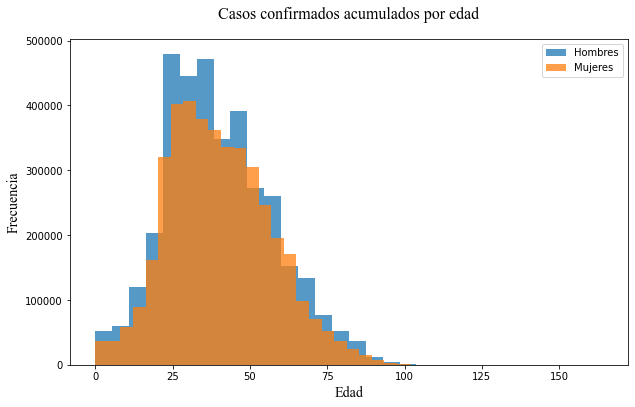

In [24]:
# Histograma:

H = Confirmados[Confirmados['SEXO'] == 2]['EDAD']

M = Confirmados[Confirmados['SEXO'] == 1]['EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Casos confirmados acumulados por edad', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

In [25]:
#

Confirmados["FECHA_SINTOMAS"].value_counts()

FECHA_SINTOMAS
2022-01-10    80705
2022-01-17    70285
2022-01-11    61831
2022-01-12    59844
2022-01-18    59012
              ...  
2020-02-27        2
2020-02-19        1
2020-02-26        1
2020-02-23        1
2020-02-25        1
Name: count, Length: 1605, dtype: int64

In [26]:
#

Confirmados["FECHA_INGRESO"].value_counts()

FECHA_INGRESO
2022-01-17    81302
2022-01-12    75684
2022-01-18    75305
2022-01-13    74978
2022-01-14    73472
              ...  
2023-11-05        3
2020-03-01        2
2024-04-13        2
2020-02-29        2
2020-02-28        2
Name: count, Length: 1601, dtype: int64

## Casos sospechosos

* 6 = CASO SOSPECHOSO: aplica cuando el caso no tienen asociación clínico epidemiológica, ni dictaminación a COVID-19 y no se le tomó muestra, o se le tomó muestra y está pendiente de resultado, sin importar otra condición

In [27]:
#

Sospechosos = df[ df["CLASIFICACION_FINAL"] == 6 ]

Sospechosos.shape 

(833972, 44)

## Defunciones

La base de datos no cuenta con una columna que indique de forma categórica si el caso falleció o no. 

Podemos obtener este dato de forma indirecta; utillizando la fecha de defunción en "FECHA_DEF"

In [28]:
#

df["FECHA_DEF"].value_counts()

FECHA_DEF
9999-99-99    20106386
2021-01-20        1738
2021-01-25        1719
2021-01-19        1691
2021-01-21        1673
                ...   
2020-01-06           3
2020-01-05           2
2020-01-04           1
2020-01-02           1
2024-07-15           1
Name: count, Length: 1658, dtype: int64

In [29]:
#
#Confirmados = df[ df["CLASIFICACION_FINAL"].isin( [1, 2, 3] ) ]


Defunciones = df[ ( df["CLASIFICACION_FINAL"].isin( [1, 2, 3] ) ) & ( df["FECHA_DEF"] != "9999-99-99"  ) ]
Defunciones.shape 

(335874, 44)

Gráfica - Histograma por sexo

In [30]:
# CLAVE	DESCRIPCIÓN
# 1 - MUJER
# 2 - HOMBRE

Defunciones['SEXO'].value_counts()

SEXO
2    206631
1    129243
Name: count, dtype: int64

In [31]:
Defunciones[Defunciones['SEXO'] == 2]['EDAD']

138         58
209         53
24059       47
24798       39
24993       63
            ..
20553856     0
20553880    78
20555290    41
20555293    59
20556222    86
Name: EDAD, Length: 206631, dtype: int64

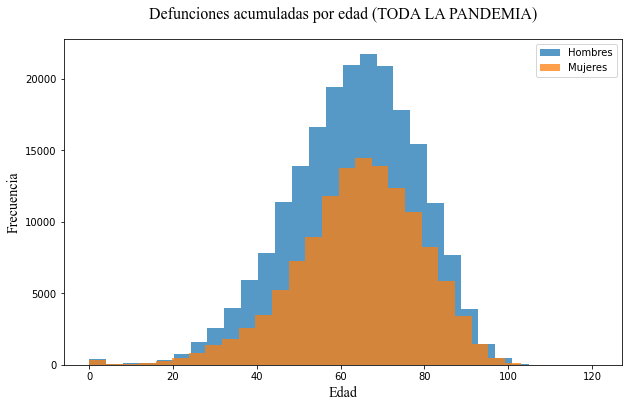

In [32]:
# Histograma:

H = Defunciones[(Defunciones['SEXO'] == 2) ]['EDAD']

M = Defunciones[(Defunciones['SEXO'] == 1) ]['EDAD']

plt.figure(figsize=(10, 6))  

# Añadir los histogramas. alpha es para la opacidad.
plt.hist(H, bins=30, alpha=0.75, label='Hombres')
plt.hist(M, bins=30, alpha=0.75, label='Mujeres')

# Configurar las leyendas
plt.legend(loc = 'upper right')

# Título y etiquetas
plt.title('Defunciones acumuladas por edad (TODA LA PANDEMIA)', fontsize=16, fontname='Times New Roman', pad=20)
plt.xlabel('Edad', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frecuencia', fontsize=14, fontname='Times New Roman')

plt.show()

## Serie de casos confirmados diarios

In [33]:
# Agrupando por fechas: 

Grupos_fecha = Confirmados.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Confirmados = Grupos_fecha.size().to_frame("Confirmados").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Confirmados["Fecha"] = pd.to_datetime(Serie_Confirmados["FECHA_SINTOMAS"])

Serie_Confirmados.head()

,FECHA_SINTOMAS,Confirmados,Fecha
0,2020-02-19,1,2020-02-19
1,2020-02-22,2,2020-02-22
2,2020-02-23,1,2020-02-23
3,2020-02-25,1,2020-02-25
4,2020-02-26,1,2020-02-26


In [34]:
# Agrupando por fechas: 

Grupos_fecha = Confirmados.groupby("FECHA_INGRESO")

# Guardamos como Data Frame

Serie_Confirmados_B = Grupos_fecha.size().to_frame("Confirmados").reset_index()

Serie_Confirmados_B = Serie_Confirmados_B.rename(columns = {'Confirmados': 'Confirmados_Ing'})

# Convertimos a tipo de dato fecha la columna:

Serie_Confirmados_B["Fecha"] = pd.to_datetime(Serie_Confirmados_B["FECHA_INGRESO"])

Serie_Confirmados_B.head()

,FECHA_INGRESO,Confirmados_Ing,Fecha
0,2020-02-27,4,2020-02-27
1,2020-02-28,2,2020-02-28
2,2020-02-29,2,2020-02-29
3,2020-03-01,2,2020-03-01
4,2020-03-02,5,2020-03-02


## Serie de defunciones diarias

### A. Por fecha de sintomas

In [35]:
# Agrupando por fechas: 

Grupos_fecha = Defunciones.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Defunciones_A = Grupos_fecha.size().to_frame("Defunciones").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Defunciones_A["Fecha"] = pd.to_datetime(Serie_Defunciones_A["FECHA_SINTOMAS"])

Serie_Defunciones_A.head()

,FECHA_SINTOMAS,Defunciones,Fecha
0,2020-02-26,1,2020-02-26
1,2020-02-29,1,2020-02-29
2,2020-03-01,1,2020-03-01
3,2020-03-02,2,2020-03-02
4,2020-03-03,2,2020-03-03


### B. Por fecha de defunción

In [36]:
# Agrupando por fechas: 

Grupos_fecha = Defunciones.groupby("FECHA_DEF")

# Guardamos como Data Frame

Serie_Defunciones_B = Grupos_fecha.size().to_frame("Defunciones").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Defunciones_B["Fecha"] = pd.to_datetime(Serie_Defunciones_B["FECHA_DEF"])

Serie_Defunciones_B.head()

,FECHA_DEF,Defunciones,Fecha
0,2020-03-18,3,2020-03-18
1,2020-03-20,1,2020-03-20
2,2020-03-22,2,2020-03-22
3,2020-03-23,1,2020-03-23
4,2020-03-24,3,2020-03-24


## Serie de casos sospechosos diarios

In [37]:
# Agrupando por fechas: 

Grupos_fecha = Sospechosos.groupby("FECHA_SINTOMAS")

# Guardamos como Data Frame

Serie_Sospechosos = Grupos_fecha.size().to_frame("Sospechosos").reset_index()

# Convertimos a tipo de dato fecha la columna:

Serie_Sospechosos["Fecha"] = pd.to_datetime(Serie_Sospechosos["FECHA_SINTOMAS"])

Serie_Sospechosos.head()

,FECHA_SINTOMAS,Sospechosos,Fecha
0,2020-01-01,132,2020-01-01
1,2020-01-02,113,2020-01-02
2,2020-01-03,112,2020-01-03
3,2020-01-04,107,2020-01-04
4,2020-01-05,163,2020-01-05


## Graficando 

In [38]:
# Preparamos DataFrame's

conf = Serie_Confirmados[['Confirmados', 'Fecha']] # Fecha de síntomas

conf_b = Serie_Confirmados_B[['Confirmados_Ing', 'Fecha']] # Fecha de ingreso

defun_a = Serie_Defunciones_A[['Defunciones', 'Fecha']] # Fecha de síntomas

defun_b = Serie_Defunciones_B[['Defunciones', 'Fecha']] # Fecha de defunción

sosp = Serie_Sospechosos[['Sospechosos', 'Fecha']] # Fecha de síntomas

In [39]:
# Unimos las series: 

# Confirmados + Confirmados (con fecha de ingreso)
Series_Casos = pd.merge(conf, conf_b, how = 'outer', on = 'Fecha')

# Confirmados + Defunciones (con fecha de síntomas)
Series_Casos = pd.merge(Series_Casos, defun_a, how = 'outer', on = 'Fecha')

# Renombramos serie defunciones por fecha de síntomas
Series_Casos = Series_Casos.rename(columns = {'Defunciones': 'Defunciones_Sint'})

# Confirmados + Defunciones (con fecha de síntomas) + Defunciones (con fecha de muerte)
Series_Casos = pd.merge(Series_Casos, defun_b, how = 'outer', on = 'Fecha')

# Renombramos serie defunciones por fecha de muerte
Series_Casos = Series_Casos.rename(columns = {'Defunciones': 'Defunciones_Muer'})

# Confirmados + Defunciones (con fecha de síntomas) + Defunciones (con fecha de muerte) + Sospechosos
Series_Casos = pd.merge(Series_Casos, sosp, how = 'outer', on = 'Fecha')

#Series_Casos = Series_Casos.sort_values(by = 'Fecha', ascending = False)

Series_Casos.head()

,Confirmados,Fecha,Confirmados_Ing,Defunciones_Sint,Defunciones_Muer,Sospechosos
0,1.00,2020-02-19,NaN,NaN,NaN,217
1,2.00,2020-02-22,NaN,NaN,NaN,224
2,1.00,2020-02-23,NaN,NaN,NaN,238
3,1.00,2020-02-25,NaN,NaN,NaN,241
4,1.00,2020-02-26,NaN,1.00,NaN,197


In [40]:
# Ordenamos y reemplazamos nulos por ceros (0)

#Series_Casos = Series_Casos.fillna(0)

Series_Casos = Series_Casos.sort_values(by = 'Fecha', ascending = True).reset_index()

Series_Casos = Series_Casos[['Fecha', 'Confirmados', 'Confirmados_Ing', 'Sospechosos', 'Defunciones_Sint', 'Defunciones_Muer']]

Series_Casos

,Fecha,Confirmados,Confirmados_Ing,Sospechosos,Defunciones_Sint,Defunciones_Muer
0,2020-01-01,NaN,NaN,132,NaN,NaN
1,2020-01-02,NaN,NaN,113,NaN,NaN
2,2020-01-03,NaN,NaN,112,NaN,NaN
3,2020-01-04,NaN,NaN,107,NaN,NaN
4,2020-01-05,NaN,NaN,163,NaN,NaN
...,...,...,...,...,...,...
1653,2024-07-11,28.00,73.00,173,NaN,1.00
1654,2024-07-12,8.00,46.00,213,NaN,2.00
1655,2024-07-13,10.00,5.00,135,NaN,3.00
1656,2024-07-14,6.00,7.00,132,NaN,NaN


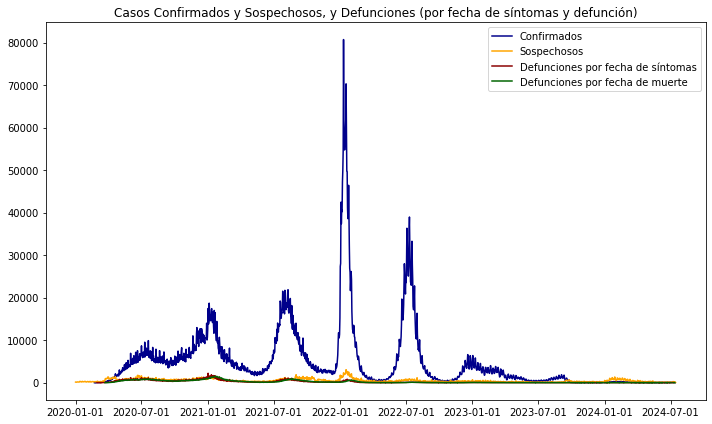

In [41]:
# Series TODAS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'], label='Confirmados', color='darkblue')
plt.plot(Series_Casos['Fecha'], Series_Casos['Sospechosos'], label='Sospechosos', color='orange')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'], label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'], label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Casos Confirmados y Sospechosos, y Defunciones (por fecha de síntomas y defunción)')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

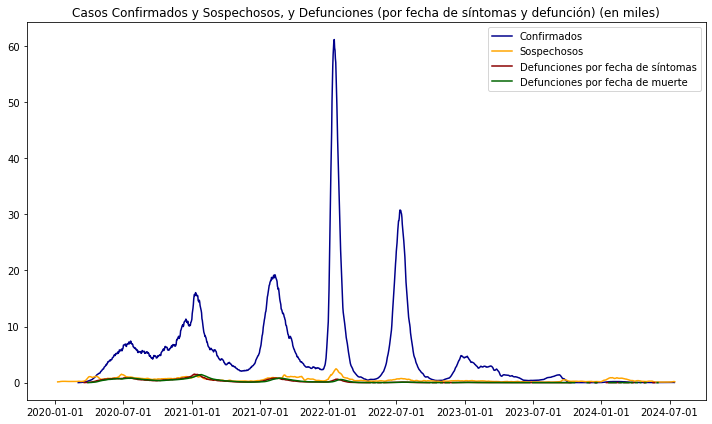

In [42]:
# Series TODAS - Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].rolling(window = 7).mean()/1000, label='Confirmados', color='darkblue')
plt.plot(Series_Casos['Fecha'], Series_Casos['Sospechosos'].rolling(window = 7).mean()/1000, label='Sospechosos', color='orange')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Casos Confirmados y Sospechosos, y Defunciones (por fecha de síntomas y defunción) (en miles)')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

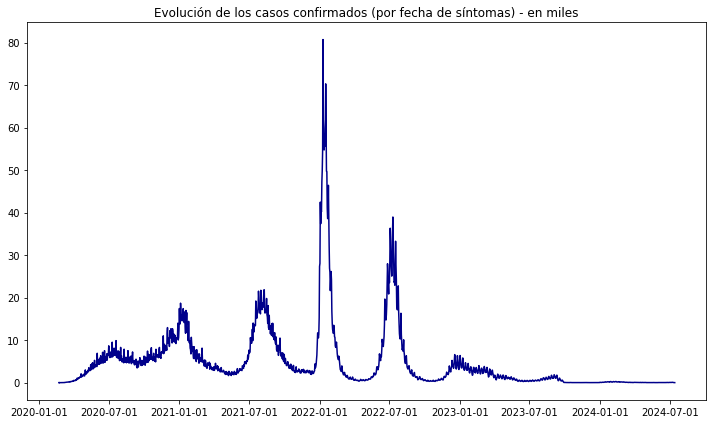

In [43]:
# Series Confirmados

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados']/1000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Evolución de los casos confirmados (por fecha de síntomas) - en miles')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [44]:
# Sanity Check

sum(Series_Casos[Series_Casos['Fecha'] <= '2024-01-01']['Confirmados'].fillna(0))

7713487.0

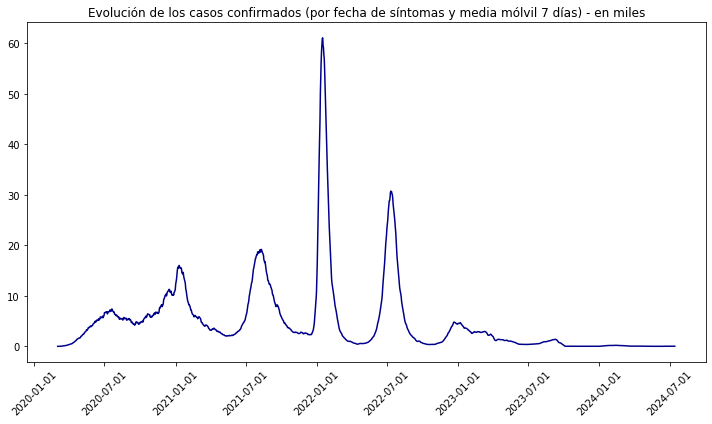

In [45]:
# Series Confirmados Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].rolling(window = 7).mean()/1000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Evolución de los casos confirmados (por fecha de síntomas y media mólvil 7 días) - en miles')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

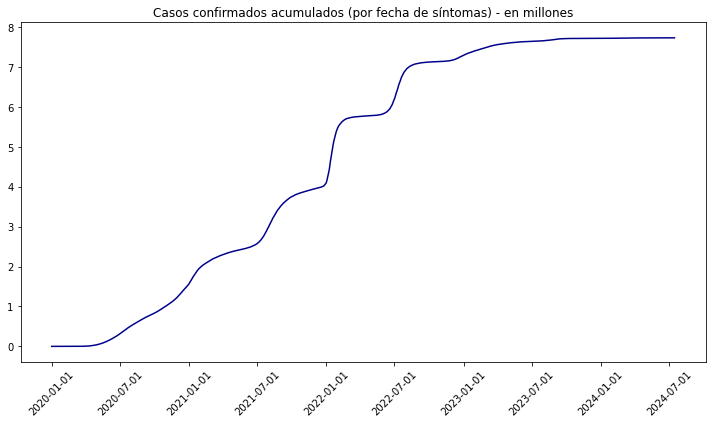

In [46]:
# Series Confirmados ACUMULADOS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Confirmados'].fillna(0).cumsum()/1000000, label='Confirmados', color='darkblue')

# Configura el título y las leyendas
plt.title('Casos confirmados acumulados (por fecha de síntomas) - en millones')
#plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=45)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

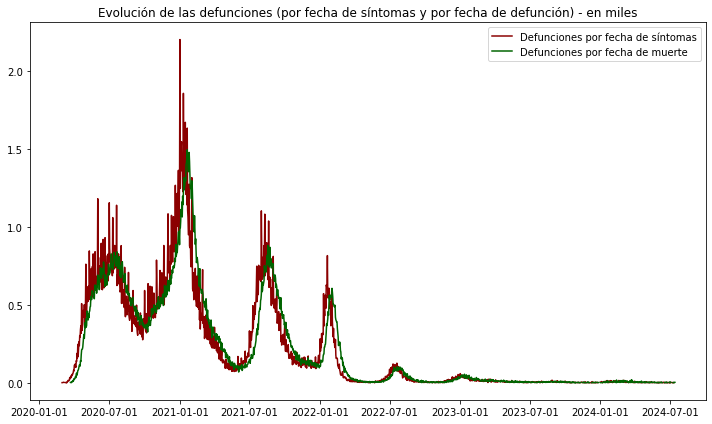

In [47]:
# Series Defunciones (fecha síntomas y fecha de defunción)

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint']/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer']/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Evolución de las defunciones (por fecha de síntomas y por fecha de defunción) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

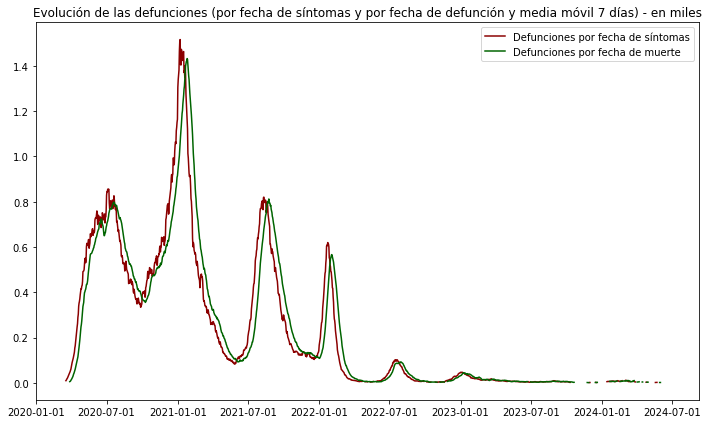

In [48]:
# Series Defunciones Medias Móviles

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].rolling(window = 7).mean()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Evolución de las defunciones (por fecha de síntomas y por fecha de defunción y media móvil 7 días) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

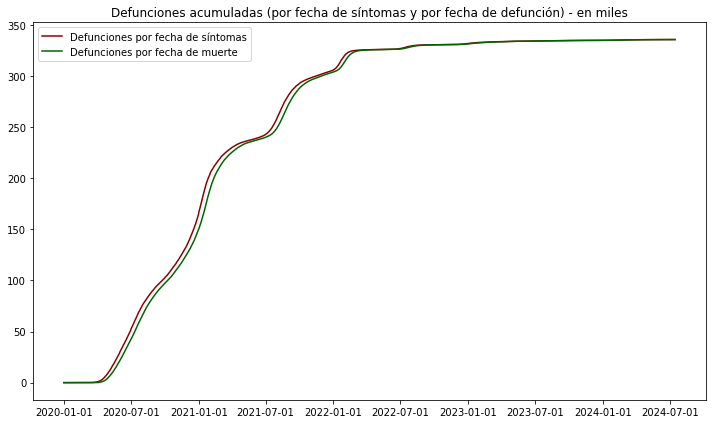

In [49]:
# Series Defunciones TODAS ACUMULADAS

plt.figure(figsize=(10, 6)) 

# Agrega cada serie de datos como una línea en el gráfico
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Sint'].fillna(0).cumsum()/1000, label='Defunciones por fecha de síntomas', color='darkred')
plt.plot(Series_Casos['Fecha'], Series_Casos['Defunciones_Muer'].fillna(0).cumsum()/1000, label='Defunciones por fecha de muerte', color='darkgreen')

# Configura el título y las leyendas
plt.title('Defunciones acumuladas (por fecha de síntomas y por fecha de defunción) - en miles')
plt.legend()

# Formato de la fecha en el eje X
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.xticks(rotation=0)  # Rota las fechas para mejor lectura

# Muestra el gráfico
plt.tight_layout()  
plt.show()

In [50]:
#

Series_Casos.head()

,Fecha,Confirmados,Confirmados_Ing,Sospechosos,Defunciones_Sint,Defunciones_Muer
0,2020-01-01,NaN,NaN,132,NaN,NaN
1,2020-01-02,NaN,NaN,113,NaN,NaN
2,2020-01-03,NaN,NaN,112,NaN,NaN
3,2020-01-04,NaN,NaN,107,NaN,NaN
4,2020-01-05,NaN,NaN,163,NaN,NaN


In [51]:
#

Series_Casos.tail()

,Fecha,Confirmados,Confirmados_Ing,Sospechosos,Defunciones_Sint,Defunciones_Muer
1653,2024-07-11,28.00,73.00,173,NaN,1.00
1654,2024-07-12,8.00,46.00,213,NaN,2.00
1655,2024-07-13,10.00,5.00,135,NaN,3.00
1656,2024-07-14,6.00,7.00,132,NaN,NaN
1657,2024-07-15,NaN,18.00,34,NaN,NaN


In [52]:
# To CSV:

#Series_Casos.to_csv('Series_Casos.csv', index = False, encoding = 'utf-8-sig')

## Algoritmos de agrupamiento (clustering)

Sabemos que los algoritmos pertenecientes a la familia del Aprendizaje No Supervisado no tienen ninguna variable que predecir ligada a los datos. En lugar de tener una salida, los datos solo tienen una entrada que serían múltiples variables que describen los datos. Aquí es donde entra en juego la agrupación.

Clustering es la tarea de agrupar un conjunto de objetos de manera que los objetos del mismo grupo sean más similares entre sí que a los objetos de otros grupos. La similitud es una métrica que refleja la fuerza de la relación entre dos objetos de datos. 

La agrupación en clústeres se utiliza principalmente (pero no exclusivamente) para la exploración de datos. Tiene múltiples usos en muchos campos, como el machine learning, el reconocimiento de patrones, el análisis de imágenes, la recuperación de información, la bioinformática, la compresión de datos y los gráficos por computadora.

Hacemos un repaso de esas técnicas.

### K-medias

Existen muchos modelos de agrupación. Revisaremos los más populares. A pesar de su simplicidad, K-means se utiliza ampliamente para la agrupación en clústeres en muchas aplicaciones de ciencia de datos, lo que es especialmente útil si necesita descubrir rápidamente información a partir de datos sin etiquetar. En este notebook, vemos cómo utilizar k-Means para la segmentación de casos.

In [53]:
#Confirmados, Sospechosos, Defunciones
# Definición de catalógos:
ESTADO = ['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR', 'CAMPECHE', 'COAHUILA DE ZARAGOZA', 
          'COLIMA', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO', 'DURANGO', 'GUANAJUATO', 'GUERRERO', 'HIDALGO', 
          'JALISCO', 'MÉXICO', 'MICHOACÁN DE OCAMPO', 'MORELOS', 'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 
          'QUERÉTARO', 'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO', 'TAMAULIPAS', 
          'TLAXCALA', 'VERACRUZ DE IGNACIO DE LA LLAVE', 'YUCATÁN', 'ZACATECAS']

ABREVIATURA = ['AS', 'BC', 'BS', 'CC', 'CL', 'CM', 'CS', 'CH', 'DF', 'DG', 'GT', 'GR', 'HG', 'JC', 'MC', 'MN',
               'MS', 'NT', 'NL', 'OC', 'PL', 'QT', 'QR', 'SP', 'SL', 'SR', 'TC', 'TS', 'TL', 'VZ', 'YN', 'ZS']
#

In [54]:
#

Defunciones_KM = Defunciones

Defunciones_KM.shape

(335874, 44)

In [55]:
# Variable de Días

Defunciones_KM['Dias_Ing'] = ( pd.to_timedelta( 
                        pd.to_datetime( Defunciones_KM['FECHA_INGRESO'], format = '%Y-%m-%d' ) - \
                        pd.to_datetime( Defunciones_KM['FECHA_SINTOMAS'], format = '%Y-%m-%d' ) 
                   ).dt.total_seconds() / 3600 ) / 24

Defunciones_KM['Dias_Def'] = ( pd.to_timedelta( 
                        pd.to_datetime( Defunciones_KM['FECHA_DEF'], format = '%Y-%m-%d' ) - \
                        pd.to_datetime( Defunciones_KM['FECHA_SINTOMAS'], format = '%Y-%m-%d' ) 
                   ).dt.total_seconds() / 3600 ) / 24

In [56]:
#

Defunciones_KM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335874 entries, 77 to 20556222
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FECHA_ACTUALIZACION        335874 non-null  object 
 1   ID_REGISTRO                335874 non-null  object 
 2   ORIGEN                     335874 non-null  int64  
 3   SECTOR                     335874 non-null  int64  
 4   ENTIDAD_UM                 335874 non-null  int64  
 5   SEXO                       335874 non-null  int64  
 6   ENTIDAD_NAC                335874 non-null  int64  
 7   ENTIDAD_RES                335874 non-null  int64  
 8   MUNICIPIO_RES              335874 non-null  int64  
 9   TIPO_PACIENTE              335874 non-null  int64  
 10  FECHA_INGRESO              335874 non-null  object 
 11  FECHA_SINTOMAS             335874 non-null  object 
 12  FECHA_DEF                  335874 non-null  object 
 13  INTUBADO                   3358

In [57]:
# Pienso que estas son las variables relevantes de la tabla:
# 'ENTIDAD_UM', 'ENTIDAD_RES', 'SEXO', 'EDAD', 'EMBARAZO', 'INDIGENA', 
# 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 
# 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
# 'UCI', 'INTUBADO', 'Dias_Ing', 'Dias_Def'

Defunciones_KM.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,RESULTADO_PCR,RESULTADO_PCR_COINFECCION,CLASIFICACION_FINAL_COVID,CLASIFICACION_FINAL_FLU,Dias_Ing,Dias_Def
77,2021-10-31,z49a69,1,12,23,1,23,23,4,2,2020-07-20,2020-07-17,2020-07-21,1,1,66,1,2,2,2,1,2,2,2,1,2,2,1,2,2,1,2,97.00,2,97,2,99,MÃ©xico,97,1,NaN,NaN,NaN,NaN,3.00,4.00
138,2021-10-31,1236ca,1,3,15,2,15,15,60,2,2020-12-14,2020-12-12,2020-12-17,2,1,58,1,97,99,99,1,2,2,2,1,2,1,2,1,2,2,1,1.00,2,97,3,99,MÃ©xico,97,2,NaN,NaN,NaN,NaN,2.00,5.00
159,2021-10-31,12914d,1,12,32,1,32,32,56,2,2020-12-15,2020-12-15,2020-12-15,2,1,30,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1.00,2,97,3,99,MÃ©xico,97,2,NaN,NaN,NaN,NaN,0.00,0.00
209,2021-10-31,0a7fa2,1,12,28,2,30,28,32,2,2020-06-28,2020-06-22,2020-06-28,2,1,53,1,97,2,2,1,2,2,2,1,98,98,1,98,1,1,1,1.00,2,97,3,99,MÃ©xico,97,2,NaN,NaN,NaN,NaN,6.00,6.00
24059,2021-10-31,06f865,1,4,5,2,5,5,18,2,2020-03-16,2020-03-16,2020-03-28,2,1,47,1,97,2,2,1,2,2,2,1,2,2,2,2,2,99,1,1.00,2,97,3,99,MÃ©xico,97,2,NaN,NaN,NaN,NaN,0.00,12.00


In [58]:
# 

Defunciones_KM.ENTIDAD_UM.value_counts(normalize = True)

ENTIDAD_UM
9    0.17
15   0.11
14   0.06
30   0.05
21   0.05
19   0.05
11   0.05
2    0.04
26   0.03
8    0.03
25   0.03
5    0.03
16   0.03
28   0.03
13   0.03
24   0.02
31   0.02
22   0.02
12   0.02
27   0.02
20   0.02
17   0.02
23   0.01
32   0.01
1    0.01
10   0.01
18   0.01
29   0.01
3    0.01
6    0.01
7    0.01
4    0.01
Name: proportion, dtype: float64

In [59]:
# 

Defunciones_KM.ENTIDAD_RES.value_counts(normalize=True)

ENTIDAD_RES
15   0.14
9    0.13
14   0.06
30   0.05
21   0.05
19   0.05
11   0.05
2    0.04
26   0.03
8    0.03
25   0.03
16   0.03
5    0.03
13   0.03
28   0.02
24   0.02
31   0.02
12   0.02
22   0.02
20   0.02
27   0.02
17   0.02
23   0.01
32   0.01
10   0.01
1    0.01
18   0.01
29   0.01
3    0.01
7    0.01
4    0.01
6    0.01
Name: proportion, dtype: float64

In [60]:
# 

Defunciones_KM.SEXO.value_counts(normalize = True)

SEXO
2   0.62
1   0.38
Name: proportion, dtype: float64

In [61]:
# 

Defunciones_KM.EDAD.value_counts(normalize = True)

EDAD
65    0.03
67    0.03
68    0.03
63    0.03
66    0.03
      ... 
107   0.00
110   0.00
109   0.00
121   0.00
119   0.00
Name: proportion, Length: 113, dtype: float64

In [62]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM['EDAD'] <= 100 ]

Defunciones_KM.shape

(335736, 46)

In [63]:
# 

Defunciones_KM.EMBARAZO.value_counts(normalize = True)

EMBARAZO
97   0.62
2    0.38
1    0.00
98   0.00
99   0.00
Name: proportion, dtype: float64

In [64]:
# 

Defunciones_KM.INDIGENA.value_counts(normalize = True)

INDIGENA
2    0.96
99   0.02
1    0.02
Name: proportion, dtype: float64

In [65]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INDIGENA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(327715, 46)

In [66]:
# 

Defunciones_KM.DIABETES.value_counts(normalize = True)

DIABETES
2    0.63
1    0.37
98   0.00
Name: proportion, dtype: float64

In [67]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["DIABETES"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(326173, 46)

In [68]:
# 

Defunciones_KM.EPOC.value_counts(normalize = True)

EPOC
2    0.95
1    0.05
98   0.00
Name: proportion, dtype: float64

In [69]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["EPOC"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325935, 46)

In [70]:
# 

Defunciones_KM.ASMA.value_counts(normalize = True)

ASMA
2    0.98
1    0.02
98   0.00
Name: proportion, dtype: float64

In [71]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["ASMA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325878, 46)

In [72]:
# 

Defunciones_KM.INMUSUPR.value_counts(normalize = True)

INMUSUPR
2    0.98
1    0.02
98   0.00
Name: proportion, dtype: float64

In [73]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INMUSUPR"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325788, 46)

In [74]:
# 

Defunciones_KM.HIPERTENSION.value_counts(normalize = True)

HIPERTENSION
2    0.56
1    0.44
98   0.00
Name: proportion, dtype: float64

In [75]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["HIPERTENSION"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(325725, 46)

In [76]:
# 

Defunciones_KM.OTRA_COM.value_counts(normalize = True)

OTRA_COM
2    0.94
1    0.05
98   0.00
Name: proportion, dtype: float64

In [77]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["OTRA_COM"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(324220, 46)

In [78]:
# 

Defunciones_KM.CARDIOVASCULAR.value_counts(normalize = True)

CARDIOVASCULAR
2    0.95
1    0.05
98   0.00
Name: proportion, dtype: float64

In [79]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["CARDIOVASCULAR"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(324152, 46)

In [80]:
# 

Defunciones_KM.OBESIDAD.value_counts(normalize = True)

OBESIDAD
2    0.80
1    0.20
98   0.00
Name: proportion, dtype: float64

In [81]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["OBESIDAD"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(324010, 46)

In [82]:
# 

Defunciones_KM.RENAL_CRONICA.value_counts(normalize = True)

RENAL_CRONICA
2    0.93
1    0.07
98   0.00
Name: proportion, dtype: float64

In [83]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["RENAL_CRONICA"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323948, 46)

In [84]:
# 

Defunciones_KM.TABAQUISMO.value_counts(normalize = True)

TABAQUISMO
2    0.93
1    0.07
98   0.00
Name: proportion, dtype: float64

In [85]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["TABAQUISMO"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(323837, 46)

In [86]:
# 

Defunciones_KM.UCI.value_counts(normalize = True)

UCI
2    0.86
1    0.09
97   0.04
99   0.01
Name: proportion, dtype: float64

In [87]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["UCI"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(307617, 46)

In [88]:
# 

Defunciones_KM.INTUBADO.value_counts(normalize = True)

INTUBADO
2    0.78
1    0.22
99   0.00
Name: proportion, dtype: float64

In [89]:
#

Defunciones_KM = Defunciones_KM[ Defunciones_KM["INTUBADO"].isin( [1, 2] ) ]

Defunciones_KM.shape 

(307605, 46)

In [90]:
# 

Defunciones_KM[ ['Dias_Ing', 'Dias_Def']].describe()

,Dias_Ing,Dias_Def
count,"307,605.00","307,605.00"
mean,5.30,13.79
std,4.03,11.04
min,-13.00,-37.00
25%,2.00,7.00
50%,5.00,12.00
75%,7.00,18.00
max,328.00,466.00


In [91]:
#

Defunciones_KM = Defunciones_KM[ ( Defunciones_KM['Dias_Ing'] >= 0 ) & ( Defunciones_KM['Dias_Ing'] <= 20 ) & \
                                 ( Defunciones_KM['Dias_Def'] >= 0 ) & ( Defunciones_KM['Dias_Def'] <= 60 ) ]

Defunciones_KM.shape

(305794, 46)

In [92]:
# 

Defunciones_KM[ ['Dias_Ing', 'Dias_Def']].describe()

,Dias_Ing,Dias_Def
count,"305,794.00","305,794.00"
mean,5.24,13.45
std,3.80,8.66
min,0.00,0.00
25%,2.00,7.00
50%,5.00,12.00
75%,7.00,18.00
max,20.00,60.00


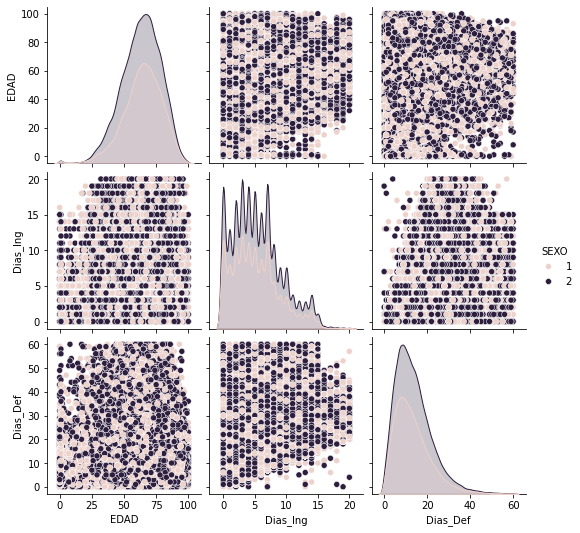

In [93]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( Defunciones_KM[ [ 'SEXO','EDAD', 'Dias_Ing', 'Dias_Def' ] ] , hue = 'SEXO' )

plt.show()

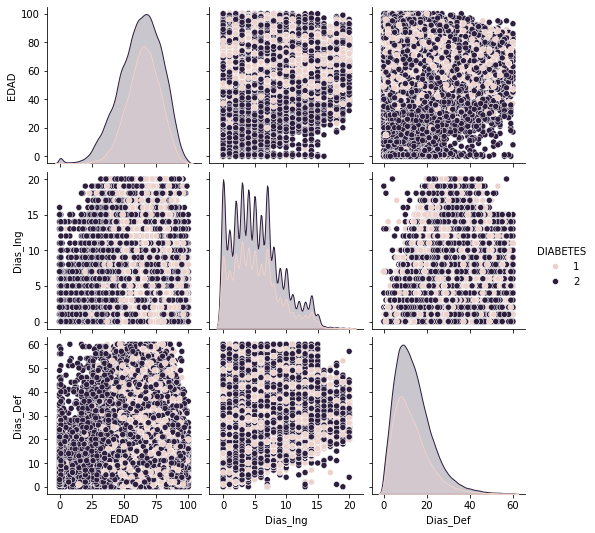

In [94]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( Defunciones_KM[ [ 'DIABETES','EDAD', 'Dias_Ing', 'Dias_Def' ] ] , hue = 'DIABETES' )

plt.show()

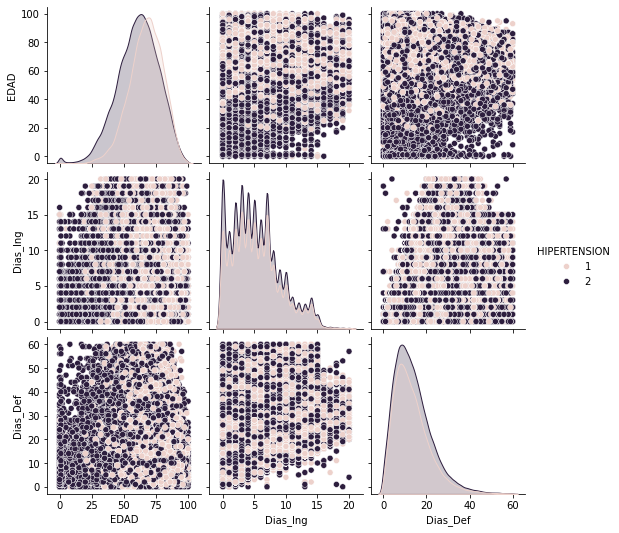

In [95]:
# Let's see our data in a detailed way with pairplot

sns.pairplot( Defunciones_KM[ [ 'HIPERTENSION','EDAD', 'Dias_Ing', 'Dias_Def' ] ] , hue = 'HIPERTENSION' )

plt.show()

De los gráficos anteriores vemos que el género y otras variables no parecen tener relación directa con la segmentación de defunciones. Es por eso que podemos dejarlo y continuar con otras características, razón por la cual usaremos el parámetro X de ahora en adelante.

In [96]:
# Definimos X:

X = Defunciones_KM [ [ 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES', 'SEXO', 'EDAD', 'INDIGENA', 
                       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 
                       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
                       'UCI', 'INTUBADO', 'Dias_Ing', 'Dias_Def' ] ]

In [97]:
# 

km = KMeans( n_clusters = 3 ).fit( X.drop(['ID_REGISTRO'], axis = 1) )

km.inertia_ #km.labels_

72995805.06952894

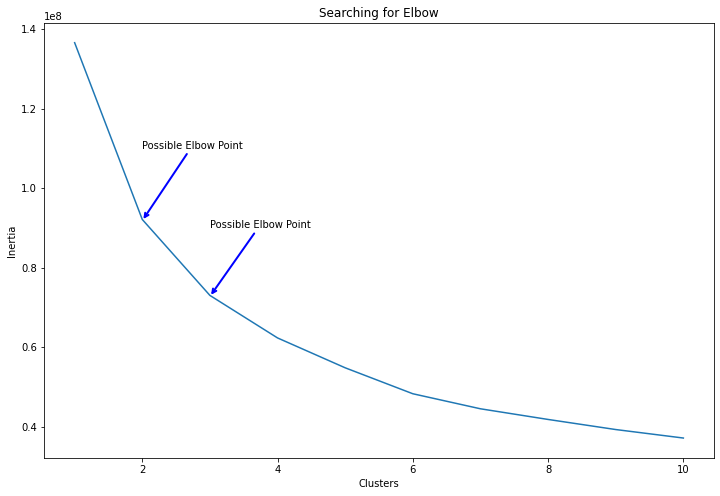

In [98]:
#

clusters = []

#
for i in range(1, 11):
    km = KMeans( n_clusters = i ).fit( X.drop(['ID_REGISTRO'], axis = 1) )
    clusters.append( km.inertia_ )

#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy = (2, 91797400), xytext = (2, 110000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

ax.annotate('Possible Elbow Point', xy = (3, 72737691), xytext = (3, 90000000), xycoords = 'data',          
             arrowprops = dict( arrowstyle = '->', connectionstyle = 'arc3', color = 'blue', lw = 2))

plt.show()

El método del codo nos dice que seleccionemos el grupo cuando hay un cambio significativo en la inercia. Como podemos ver en el gráfico, podemos decir que puede ser 2, 3 o 6. Veamos ambos resultados en el gráfico y decidamos.

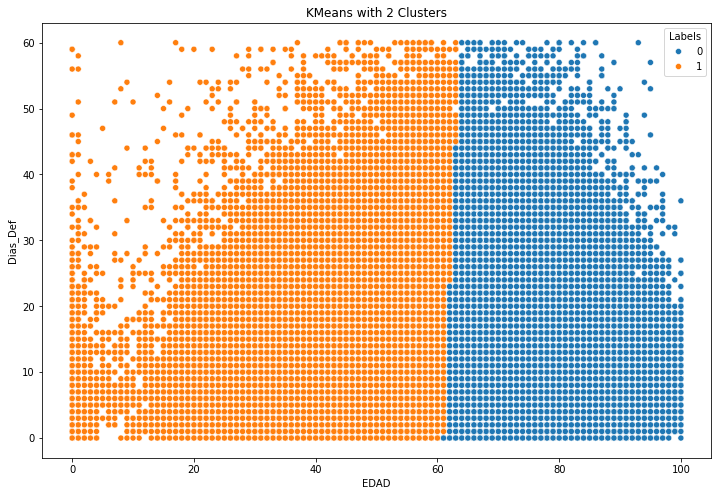

In [99]:
# 2 cluster
km2 = KMeans(n_clusters = 2).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km2.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 2 Clusters')

plt.show()

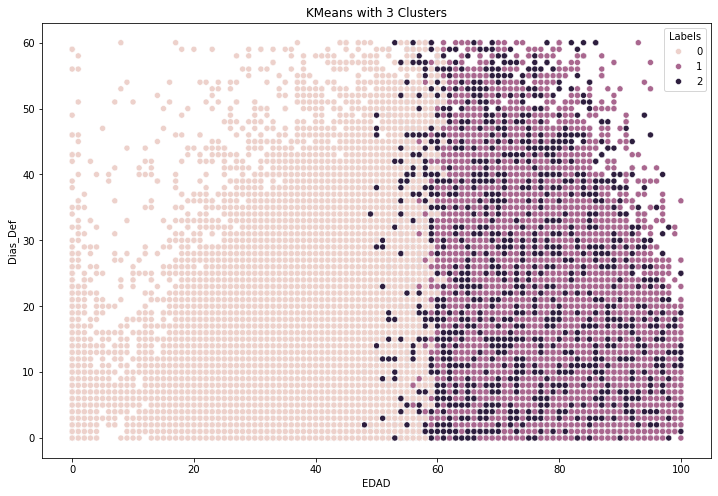

In [100]:
# 3 cluster
km3 = KMeans(n_clusters = 3).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

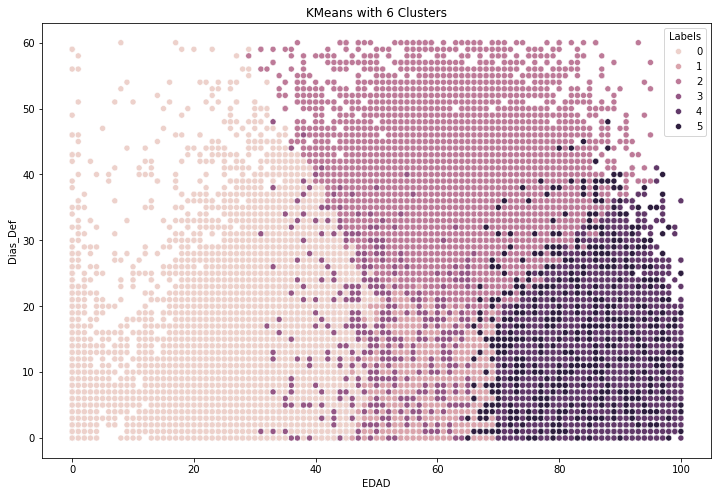

In [101]:
# 6 cluster
km6 = KMeans(n_clusters = 6).fit( X.drop(['ID_REGISTRO'], axis = 1) )

X['Labels'] = km6.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = X, x = 'EDAD', y = 'Dias_Def', hue = 'Labels' )

plt.title('KMeans with 6 Clusters')

plt.show()

In [102]:
#

X[ X['Labels'] == 0].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00","37,048.00"
mean,13.93,14.24,1.66,37.20,1.99,1.79,1.99,1.98,1.96,1.78,1.94,1.98,1.74,1.91,1.93,1.88,1.73,5.29,13.28,0.00
std,6.40,6.29,0.47,9.46,0.12,0.40,0.10,0.14,0.19,0.41,0.23,0.15,0.44,0.28,0.25,0.33,0.44,3.85,7.92,0.00
min,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,9.00,9.00,1.00,33.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,7.00,0.00
50%,14.00,15.00,2.00,39.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,12.00,0.00
75%,18.00,18.00,2.00,44.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,18.00,0.00
max,32.00,32.00,2.00,50.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,60.00,0.00


In [103]:
#

X[ X['Labels'] == 1].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00","76,109.00"
mean,10.76,11.08,1.61,59.73,1.99,1.59,1.97,1.98,1.98,1.57,1.95,1.96,1.78,1.91,1.92,1.92,1.78,4.55,10.18,1.00
std,4.44,4.50,0.49,5.99,0.10,0.49,0.18,0.12,0.15,0.50,0.21,0.19,0.41,0.28,0.27,0.27,0.41,3.41,5.10,0.00
min,1.00,1.00,1.00,44.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00
25%,9.00,9.00,1.00,55.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,1.00
50%,10.00,11.00,2.00,60.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,10.00,1.00
75%,15.00,15.00,2.00,65.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,14.00,1.00
max,32.00,32.00,2.00,69.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,19.00,25.00,1.00


In [104]:
#

X[ X['Labels'] == 2].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00","33,140.00"
mean,13.06,13.51,1.63,63.99,1.99,1.64,1.96,1.98,1.98,1.57,1.95,1.96,1.80,1.95,1.92,1.84,1.66,7.81,29.10,2.00
std,6.13,6.05,0.48,8.43,0.11,0.48,0.19,0.13,0.14,0.50,0.22,0.21,0.40,0.21,0.28,0.37,0.47,4.32,8.23,0.00
min,1.00,1.00,1.00,29.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,16.00,2.00
25%,9.00,9.00,1.00,58.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,5.00,23.00,2.00
50%,13.00,14.00,2.00,65.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,27.00,2.00
75%,16.00,16.00,2.00,70.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,11.00,33.00,2.00
max,32.00,32.00,2.00,95.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,60.00,2.00


In [105]:
#

X[ X['Labels'] == 3].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00","45,532.00"
mean,25.55,25.55,1.61,54.92,1.97,1.59,1.98,1.98,1.98,1.58,1.95,1.97,1.73,1.92,1.95,1.89,1.76,5.47,13.03,3.00
std,4.06,4.05,0.49,7.18,0.16,0.49,0.15,0.15,0.15,0.49,0.21,0.18,0.44,0.27,0.22,0.31,0.43,3.65,7.10,0.00
min,4.00,4.00,1.00,31.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,3.00
25%,22.00,22.00,1.00,50.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,3.00,8.00,3.00
50%,26.00,26.00,2.00,56.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,12.00,3.00
75%,30.00,30.00,2.00,61.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,8.00,18.00,3.00
max,32.00,32.00,2.00,67.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,51.00,3.00


In [106]:
#

X[ X['Labels'] == 4].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00","64,698.00"
mean,10.64,10.93,1.60,79.00,1.99,1.63,1.92,1.99,1.98,1.47,1.94,1.92,1.86,1.93,1.91,1.93,1.83,4.68,10.87,4.00
std,4.38,4.43,0.49,6.52,0.10,0.48,0.28,0.11,0.14,0.50,0.24,0.27,0.34,0.25,0.29,0.26,0.37,3.59,5.95,0.00
min,1.00,1.00,1.00,69.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00
25%,9.00,9.00,1.00,74.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,6.00,4.00
50%,10.00,11.00,2.00,78.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,4.00,10.00,4.00
75%,14.00,15.00,2.00,83.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,15.00,4.00
max,32.00,32.00,2.00,100.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,41.00,4.00


In [107]:
#

X[ X['Labels'] == 5].describe()

,ENTIDAD_UM,ENTIDAD_RES,SEXO,EDAD,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,UCI,INTUBADO,Dias_Ing,Dias_Def,Labels
count,"49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00","49,267.00"
mean,25.14,25.15,1.59,76.39,1.97,1.60,1.94,1.98,1.98,1.45,1.94,1.92,1.84,1.93,1.94,1.92,1.83,5.03,11.89,5.00
std,4.23,4.21,0.49,7.12,0.17,0.49,0.24,0.13,0.14,0.50,0.23,0.27,0.37,0.25,0.24,0.27,0.38,3.62,6.81,0.00
min,5.00,4.00,1.00,65.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,5.00
25%,21.00,21.00,1.00,71.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,5.00
50%,25.00,25.00,2.00,75.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,11.00,5.00
75%,30.00,30.00,2.00,81.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,7.00,16.00,5.00
max,32.00,32.00,2.00,100.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,20.00,48.00,5.00
